# Lecture Week 2-1

## Topics

## I. Classification vs. Regression

## II. The Gaussian Function

## III. The Gaussian Distribution: The Mean, Standard Deviation ($\sigma$), and Variance ($\sigma^2$)

## IV. The Simplest Regression Problem (Fitting for One Parameter) and the Weighted Mean.

## Lab Exercises

## I.  Classification vs. Regression

-  ## Classification: Find how to place a face/number/letter etc. into a discrete set of groups (Einstein/Bohr, [0, 1, ..., 9], [A, B, ..., Z], etc.).

-  ## Regression: Find the best estimate for one or more continuous quantities, given experimental observations.  It's not as different from classification as you may think.  Eventually we will use regression to make predictions -- in that context, you will see similarities between the two.  In fact some machine learning tecniques can be applied to both.

## II. The Gaussian Function

In [1]:
# Note: different mean and different width.
from IPython.core.display import HTML
HTML('<iframe src=http://www.usablestats.com/lessons/normal width=700 height=350></iframe>')


## The profile of the probability distribution is approximately described by a function called the Gaussian.

## The Gaussian function tells us how likely (the probability is represented by $P$ below) it is for a certain quantity (in the above example, height, represented by $x$) to have a certain value.


##$$
P(x) = ae^{ - {(x - \mu)^2 \over {2 \sigma^2}}}
$$



-  ## The location for peak of the distribution is usually refered to as $\mu$, and it is also the average value of the distribution (or the mean; in our case, it's the average height of men or women).

- ## The "width" of the distribtuion is captured by "sigma" ($\sigma$).  It's also called the standard deviation, as you will see later.



## For the standard Gaussian, $a = {1 \over {\sigma \sqrt{2 \pi}}}$.  This way, the area underneath the Gaussian is 1 -- as the total probability of a woman (or a man) to have *some* height is 1.

In [2]:
from IPython.core.display import HTML
HTML('<iframe src=http://images-01.delcampe-static.net/img_large/auction/000/328/188/006_001.jpg?v=2 width=1000 height=350></iframe>)')

## Breakout Exercises:

## Write a class, Gaussian.  It should have 

- ###  two attributes, mean and sigma, initialized to 0 and 1.
- ###  a method, called Calc_P, which takes an argument x, and calculates the probability for x.

## At the time of instantiation, you may using the default mean and sigma.

## Create an object of class Gaussian; call it standard_gauss.

## Use standard_gauss to calculate the probability of a single value of x, say x = 3.

## Use standard_gauss to calculate the probabilities of all the numbers in an array x, which has 1000 equally spaced values between -10 and 10.  Call the probabilities, y.  Then make an inline plot of y vs. x.

## Create another object of class Gaussian, with mean = 3 and sigma =2.5; call it gauss.

## Use guass to calculate the probabilities for the same array x.  Call the probabilities, y2.  On the same inline figure above, plot y2 vs. x.

## Students who have taken CP-I should code.

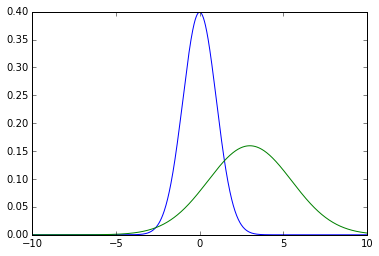

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

class Gaussian:
    def __init__(self, mean=0., sigma=1.):
        self.mean = mean
        self.sigma = sigma
        
    def Calc_P(self, x):
        a = 1./(self.sigma*(np.sqrt(2*np.pi)))
        P = a*np.exp(-((x - self.mean)**2)/(2.*(self.sigma**2)))
        return P
    
standard_gauss = Gaussian()
prob = standard_gauss.Calc_P(3)
# print(prob)
x = np.linspace(-10., 10., 1000)
y = standard_gauss.Calc_P(arr)

plt.figure()
plt.plot(x, y)
# plt.xlim(-5, 5)

gauss = Gaussian(mean=3, sigma=2.5)
y2 = gauss.Calc_P(x)

plt.plot(x, y2)

plt.show()

## II. The Gaussian Distribution

### Before you meet someone, that person's height is a random variable to you.  But that doesn't mean you have zero predictive power over the height of that person.  For example, if you know that person is a woman, it's likely that the height is within a few inches of 5'5.

### \*\*\*

### This is a VERY important insight: 

### _Just because a quantity is random, it does NOT necessarliy mean that you have zero knowledge over it!!!_

### In fact, you often have _statistical knowledge_ over it.  

### You may even argue all of modern science (social or physical) make use of this realization.

### \*\*\*


### As you saw in the example of the heights of men and women above, if you know the *distribution* of that random variable, you can make some kind of prediction -- a statistical prediction: a woman will likely have a height of 5'5 plus minus a couple of inches, more likely than having a height around 5'10. 

## A distribution built from data, say the data of heights, is basically a histogram: You divide weights into different bins, and then count how many people are in each bin. 

## We now know how to simulate random variables that follow many different kinds of distribution.

## The module you want to use is: numpy.random, for example:

- numpy.random.rand()
- numpy.random.randn()

(For more distributions, go to http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [75]:
# repeat running this cell a few times
from numpy.random import rand
x = rand()
print(x)

0.783856486452


In [280]:
# repeat running this cell a few times
from numpy.random import randn
x = randn()
print(x)

0.224294258374


In [330]:
x_u = rand(10)
print('Uniform Random Variable:\n {}'.format(x_u))

Uniform Random Variable:
 [ 0.72674995  0.13838385  0.00129362  0.635223    0.11859033  0.69548045
  0.13242757  0.14531121  0.41583868  0.56443307]


In [417]:
x_n = randn(10)
print('Gaussian (Normal) Random Variable:\n {}'.format(x_n))

Gaussian (Normal) Random Variable:
 [-0.20752564  0.34654691 -0.44468358 -1.50551787  0.41757748  0.49610983
 -1.09235905  0.65675961 -0.56661432 -1.11672074]


In [418]:
# A "standard" uniform random variable, or a uniformly distributed random variable 
# has a mean of 0.5, and can take on values between 0 and +1.  
# Any real number between 0 and 1 is *equally* probable.
x_u = rand(1000)
print('The min, max, and mean of a normally distributedly random variable:\n \
      {}, {}, {}'.format(x_u.min(),  x_u.max(), x_u.mean()))

The min, max, and mean of a normally distributedly random variable:
       0.000483472786471, 0.995971966375, 0.509866031353


In [668]:
# As mentioned before, a "standard" Gaussian random variable, or a normally distributed 
# random variable has zero mean, and can take on values between -inf and +inf.
# Numbers with large absolute values are less probable. 
x_n = randn(1000)
print('The min, max, and mean of a normally distributedly random variable:\n \
      {}, {}, {}'.format(x_n.min(),  x_n.max(), x_n.mean()))

The min, max, and mean of a normally distributedly random variable:
       -2.86327615839, 3.52233489987, 0.0179134209622


In [774]:
i = 0
while i<100:
    x_n = randn(100000)
    if x_n.min()<-5.:
        print("Yay")
    if x_n.max()>5.:
        print('Yay')
    i += 1
print('The min, max, and mean of a normally distributedly random variable:\n \
      {}, {}, {}'.format(x_n.min(),  x_n.max(), x_n.mean()))

Yay
Yay
Yay
Yay
Yay
Yay
Yay
The min, max, and mean of a normally distributedly random variable:
       -4.17245607905, 4.22159890253, -0.00325510627059


## Let's now focus on the Gaussian distribution

In [671]:
# shifting the mean
x_n_pr = x_n + 3.

## What's the mean of x_n_pr?

In [672]:
print(x_n_pr.mean())

3.02863341059


In [673]:
# Changing the sigma.
x_n_pr = x_n*2

## As you know, $\sigma$ tells you how wide the distribution is.

## Given a set of random numbers, $x_i$, drawn from a certain kind of distribution, there is a way to estimate how spread out the distribution is -- you can find out the variance of these numbers:


## $$
Var = \sum_{i}{(x_i - \mu)^2}
$$

## and the standard deviation, S:

## $$
S = \sqrt{Var}
$$
 
## For the Gaussian distribution, the standard deviation is the same as $\sigma$!

## This is one of many reasons that the Gaussian is so useful.


## For some other distributions, there may not even be a $\sigma$ in its definition (e.g. the uniform distribution), or there may be a $\sigma$ in its definition that is related to its width (e.g., the Rayleigh distribution), but $S$ is not the same as that quantity.

## Often, we assume a distribution is Gaussian; in that case,

## $$Var = S^2 = \sigma^2$$

## But keep in mind that if your assumption is wrong, then this is no longer true!


## Let's change both the mean and the sigma of a Gaussian distribution

In [776]:
# Generate Gaussian random variables with non-standard mean and sigma 
# and then verify through calculating the mean and the standard deviation.
import numpy as np
from numpy.random import randn
avg = 3.
sig = 2.

x = randn(100000)*sig + avg
# print(x)
print(np.mean(x))
print(np.std(x))

3.00077967848
1.99809140363


## Breakout Exercise:

## Generate 10000 random numbers that follow the Gaussian distribution, with a mean of 100, and sigma of 15.

## Calculate its mean and standard deviation to verify that the random numbers you have generated follow the right kind of distribution.

## Plot the histogram using matplotlib.pyplot.hist (feel free to look it up online if you forget how to use it).  Try using 25 bins.

## Students who haven't taken CP-I should code with assistance from those who have (you can even help them set axis limits).

100.203333453
14.9877000591


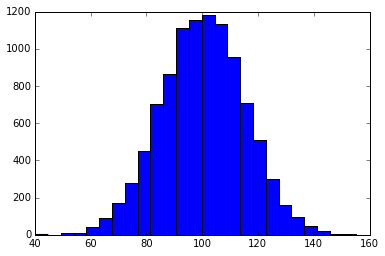

In [783]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

avg = 100.
sigma = 15.
x = randn(10000)*sigma+avg
print(np.mean(x))
print(np.std(x))
plt.figure()
bin_heights, xbins, patches = plt.hist(x, bins=25)
plt.show()

In [784]:
# To help you understand what's going on:
print('bin_heights (normalized):\n{:s}'.format(bin_heights)) 
print('bins (locations of bin edges):\n{:s}'.format(xbins))
# patches is a list that has information on the height of each bin 
# and the shape it's plotted as (rectangle, in our case).

bin_heights (normalized):
[    2.     0.     8.    12.    41.    88.   170.   278.   448.   701.
   862.  1110.  1154.  1184.  1132.   954.   711.   509.   300.   161.
    97.    47.    21.     6.     4.]
bins (locations of bin edges):
[  40.07907352   44.67375244   49.26843135   53.86311027   58.45778918
   63.0524681    67.64714701   72.24182593   76.83650484   81.43118376
   86.02586267   90.62054159   95.2152205    99.80989941  104.40457833
  108.99925724  113.59393616  118.18861507  122.78329399  127.3779729
  131.97265182  136.56733073  141.16200965  145.75668856  150.35136748
  154.94604639]


ValueError: x and y must have same first dimension

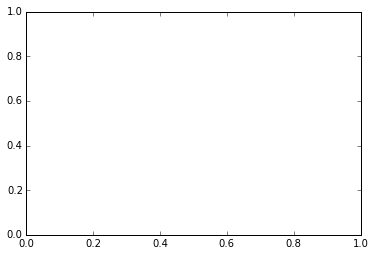

In [785]:
plt.figure()
plt.plot(xbins ,bin_heights)
plt.show()

## Breakout Excercise: Use bin_heights and xbins to plot the outline of the histograms

# 5 Min Break

## IV. The Simplest Linear Regression -- Fitting for One Parameter 

### (Recall it’s a regression problem if we are trying to determine the value of a continuous quantity the best we can.)

### In the discussion below the assumptions (there are two) we make are sandwiched between long, opposite-facing arrows:

### --->                     <---

### A) The goal of experimental science: You make measurements to gain knowledge about reality.  We will make a more practical statement of this at the end of this sub-section.

For example, let’s say, you make several temperature measurements to find out the true temperature of a room.

Let’s call the results of these measurements data, $D$.  $D$ of course consist of all the measured temperature values.  If you have measured the temperature $N$ times, and the temperature value you get for the $i$th measurement is $t_i$,  then $D$ = {$t_1$, $t_2$, $t_3$, …, $t_N$} = {$t_i$}.

In what follows below:

$T_{true}$: The true temperature

$T$: The value of a guess we have for $T_{true}$

$T_{best}$: Our best guess for $T_{true}$ according to some criterion.

$t$: Experimental result of a temperature measurement.

Each of your temperature measurements will have uncertainty.  Intuitively you know that: 

-  It’s more likely to have a measured value that is close to the true temperature than to have one that is far away.   
-  The more accurate your measurements (e.g., you have high quality equipment), the less likely it is to have a measured value that is very far away from the true temperature.


Mathematically we assume:

--->  We can model the probability of getting a certain measurement result using a Gaussian, with the true value of the quantity as $\mu$ and the measurement uncertainty as the width ($\sigma$) of the Gaussian <---

If the difference between the measured value ($t$) and the the true temperature ($T_{true}$) is ($t - T_{true}$), the probability of such a measurement occurring is 

$P(t; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t - T_{true})^2 } { 2\sigma^2 }}$	(1)

Given the uncertainty, which will always be there, you can never know the temperature for sure based on your data.  But based on your data, you try to make the best estimate for the true temperature.

### This is the goal of any experimental science. 

### B) To state the goal at the end of A) more formally:

Question 1 — _Given a set of data, what is the probability that the true temperature, $T_{true}$, has a value $T$?_  

If we can answer Question 1 then it’d be easy to obtain our best estimate for the true temperature:

_The temperature value that has the highest probability (as defined in Question 1) is our best estimate for the true temperature._  

For example, suppose you have made three measurements, and you get

$$t_1 = 68.5 \pm 0.5$$
$$t_2 = 68.3 \pm 0.5$$
$$t_3 = 68.9 \pm 0.5$$

The quantity that follows $\pm$ is the uncertainty, or sigma (see eqn (1) above).

Based on the data and the uncertainty, if someone asks you:

-  How likely is it that the true temperature, $T_{true}$, is 30?  You say, “No way!”  (Very low probability)

-  How likely is it that $T_{true}$ is 69?  You say, “I guess it’s possible.” (Intermediate probability)

-  How likely is it that $T_{true}$ is 68.5?  You say, “Quite possible.” (High probability)

If there is a way to calculate the probability for the different possible temperature values, $T$, as being $T_{true}$, then as I said, we can simply maximize that probability, and the temperature value that corresponds to the maximum probability is our best guess for the true temperature.


### C) To re-state B) Mathematically:

-  We first find the probability that the true temperature has the value $T$ given the data set $D$,

   $$P(T|D)$$ 
   
   

-  Then we maximize $P(T|D)$: The $T$ value that maximizes this probability will give us the best guess for the true temperature.

### It turns out you *CANNOT* derive an expression for this probability. 

### D) So we try another Route:

The probability for which we *CAN* derive an expression for is this:

Question 2: _Given the true temperature having a value ${T}$, what is the probability that the observed data set should have occurred?”_ 

Mathematically you can write this as 

$$P(D|T)$$

again, the probability that the observed data turns out to be $D$, given the true temperature has a value of $T$.

Note that Question 2 is different from Question 1!

Let’s focus on Question 2 for a moment.  The reason that Question 2 is answerable mathematically is that if the true temperature has value $T$, then the probability you will have a measured value of $t_1$ is (see eqn (1) above): 

$P(t_1; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_1 - T)^2 } { 2\sigma^2 }}$ 

Likewise, the probabilities you would have measured values $t_2$ and $t_3$, are  

$P(t_2; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_2 - T)^2 } { 2\sigma^2 }}$ 

$P(t_3; T) = \frac{1}{\sqrt{2\pi\sigma}} e^{ \frac{ (t_3 - T)^2 } { 2\sigma^2 }}$ 


The probability that you have all three measured values is

$P(D|T) = P(t_1, t_2, t_3; T) = P(t_1; T)P(t_2; T)P(t_3; T)$

#### We have just answered Question 2!

Let’s continue…

Given this expression, you can try using different $T$ values and see which one gives you the highest probability.  But the best way to do this is to do 


$$dP(D|T)/dT  = dP(t_1, t_2, t_3; T)/dT = 0$$

Since you now have an explicit mathematical expression for $P(D|T) = P(t_1, t_2, t_3; T)$, you can easily calculate the derivative, set it to zero, and find the $T$ value that maximizes $P(D|T)$.

So here comes the second assumption:

---> We assume that the $T$ value that maximizes the probability defined in Question 2 will maximize the probability defined in Question 1, i.e., it’s our best guess for the true temperature. <---

It is an assumption because we cannot show the same $T$ will maximize both the probabilities in Question 1 and Question 2 (because we don't have an expression for the probability in Question 1!).


Quick Re-cap:

$P(T|D)$: The probability that, given the observed data, $D$, the true temperature has a value of $T$.

$P(D|T)$: The probability that, given the true temperature has a value of $T$, the observed data $D$ would occur. 


Yes, it's a subtle difference...we will come back to this difference in Week 6.

### E) Practically (continuing the approach outlined in D)), 

if you maximize $P(D|T)$ in D) with respect to $T$, you get 

$T_{best} = \frac{1}{N} {\sum_{i = 1}^{N} {t_i} } = \langle D \rangle $        					(2) 

That is, the mean value of the data set gives the best guess we have for the true temperature $T_{true}$.

Now we can further ask this question, since $T_{best}$ must have an uncertainty (or standard deviation) as well, what would the uncertainty be?

With a little math, you can show the standard deviation of $T_{best}$ is 

$s_{T_{best}} = \frac{\sigma} {\sqrt{N}}$								(3)

In this case $N$ = 3, and so 

$s_{T_{best}} = \frac{\sigma} {1.7}$								(3)


That is, if we take into account the results of all three measurements, we now have a tighter estimate for the true temperature.

[If this is a statistics course, I would have you go through the calculations, and verify for yourself that it’s all true.]


#### Let’s now take a step back:

That the mean of the data points gives us a tighter estimate of the true temperature seems rather obvious -- why did we go through so much trouble to get here in this long-winded way.  

Because there are circumstances where it’s not nearly as obvious how to arrive at the best guess.  Then this prescription will show us how to get $T_{best}$.

For example, what if the uncertainty is different for each of the 3 temperature measurements?

It’s clear enough that in order to take into account all three measurements, you would want to give more weight to the points that have less uncertainty.  But what’s the exact prescription?

It turns out if you maximize the probability in Question 2 you will find the best guess is

$T_{best} = \frac{ \sum_{i = 1}^{N} { t_i/\sigma_i^2 } } {\sum_{i = 1}^{N} {1/\sigma_i^2} }$      	(4)

You can check that it works for the case of all three $\sigma_i$’s being the same:


$T_{best} = \frac{1}{N} {\sum_{i = 1}^{N} {t_i} }$,

or just the mean.

Eqn (3) is called the weighted mean.

Again with a  little math, the uncertainty (standard deviation) *squared* of the weighted mean can also be calculated, and it is

$s_{T_{best}}^2 = \frac{1} {\sum_{i = 1}^{N} {1/\sigma_i^2} }$				(5)

You can verify that if, 

$\sigma_i = \sigma$

eqn (5) becomes the same as eqn (3). 

## Going back to the very top: The Simplest Linear Regression -- Fitting for One Parameter.

## In this example, we're using the data to "fit for" -- that is, to find the best guess for -- the true temperature.

## Example:

- ## Generate a set of 10 Gaussian random numbers that represent 10 temperture measurements.  The true temperature is 70 and the measurement uncertainty is 0.5.  That is, the Gaussian model should have T_true (= mu) = 70 and sigma = 0.5.

    ## Note: In reality, of course, you don't know the true temperature (otherwise, what's the point of measuring it?).  But in the simulated world, you know everything!

-  ## Find the mean and standard deviation of the set of measurement results and report them as 

    ## t_mean 

    ##and 

    ##sig_t.  

    ## Are the values of t_mean and sig_t what you would expect?


In [39]:
# simluate temperature measurements
import numpy as np
from __future__ import print_function

T_true = 70
sigma = 0.5
N = 10

t = np.random.randn(N)*sigma + T_true
t_mean = t.mean()
sig_t = np.std(t)

print("The mean temperature value is {:.3f} deg (expected: {:.3f}).".format(t_mean, T_true))
print("The standard deviation of the simulated temperature measurement \
results are {:.3f} deg (expected: {:.3f}).".format(sig_t, sigma))

The mean temperature value is 69.811 deg (expected: 70.000).
The standard deviation of the simulated temperature measurement results are 0.449 deg (expected: 0.500).


## Lab Breakout Exercise:

## 1. Repeat the simulation in the example above 100 times, each time store the t_mean.  Then find the average and standard deviation of t_mean, and report these as 

## t_MEAN

## and

## sig_t_mean.  

## Find the expected standard deviation of t_mean, and report it as 

## sig_t_mean_expt

## Are the values of t_MEAN and sig_t_mean what you would expect?

## 2. Generate a set of 10 Gaussian random numbers that represent 10 temperture measurements.  The true temperature is 70 and the measurement uncertainty is different for each of the 10 measurements (let's say you used 10 different thermometers to make the 10 measurements).  Suppose the uncertainties are: (0.3, 0.4, 0.15, 0.2, 0.5, 0.6, 0.1, 0.2, 0.15, 0.25).  Find the weighted mean of the data, and report it as t_mean.

## 3. Repeat 2. above 100 times and report 

## t_MEAN, sig_t_mean, and sig_t_mean_expt.

## Are the values of t_MEAN and sig_t_mean what you would expect?
